In [8]:
from pandas import DataFrame
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [9]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop("@timestamp", axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct,anomaly
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620,0
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626,0
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628,0
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635,0
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638,0


## Normalizing Data

In [10]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [11]:
dataset_shifted = dataset.shift(-6)
dataset = dataset.iloc[:-6]
dataset_shifted = dataset_shifted.iloc[:-6]

## Spliting the dataset 
Ratio - 80 : 20

In [12]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [13]:
train_dataset = train_dataset.values.reshape((train_dataset.shape[0], 1, train_dataset.shape[1]))
print(train_dataset_shifted.shape)

(39996, 40)


## Training Models

In [14]:
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm.add(Dense(40))
model_lstm.compile(loss='mae', optimizer='adam')

model_lstm.fit(train_dataset, train_dataset_shifted, verbose=2, shuffle=False)

Epoch 1/1
 - 5s - loss: 0.2556


## Predicting 

In [15]:
test_dataset_predicted = model_lstm.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [16]:
test_dataset_predicted_pd = DataFrame(test_dataset_predicted)
test_dataset_predicted_pd = test_dataset_predicted_pd.set_index(test_dataset_shifted.index)

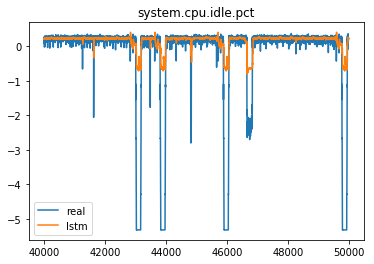

Mean Absolute Error :  0.387237001695784


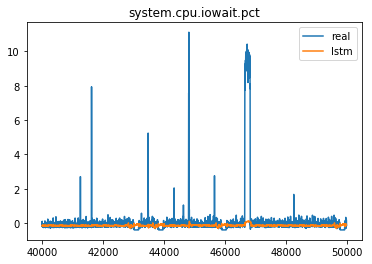

Mean Absolute Error :  0.2703450579431812


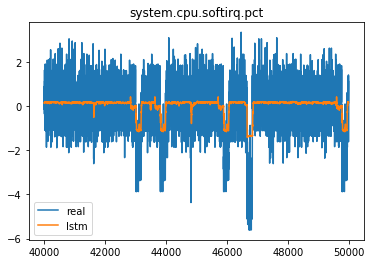

Mean Absolute Error :  0.694618822824707


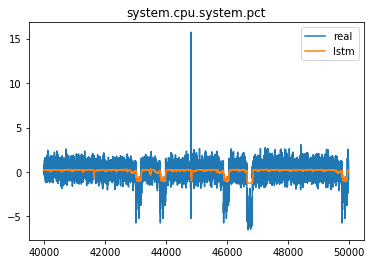

Mean Absolute Error :  0.6692485106594099


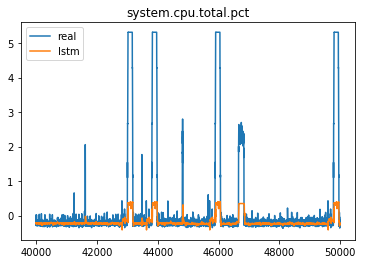

Mean Absolute Error :  0.4035080308786709


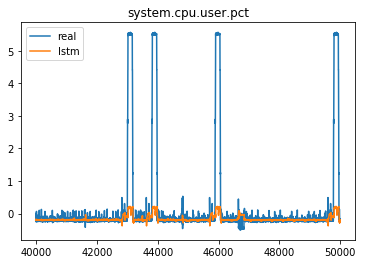

Mean Absolute Error :  0.38863952915883404


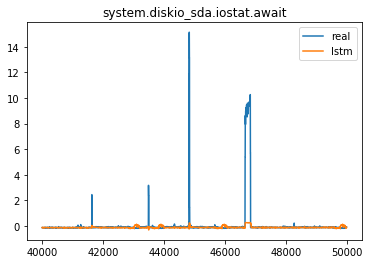

Mean Absolute Error :  0.22052730236434007


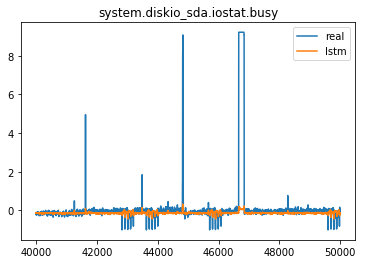

Mean Absolute Error :  0.2955850399497359


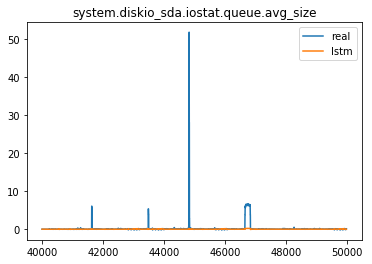

Mean Absolute Error :  0.22123299814661498


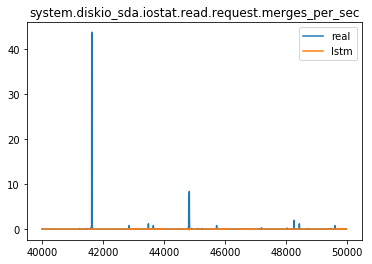

Mean Absolute Error :  0.056317486143401374


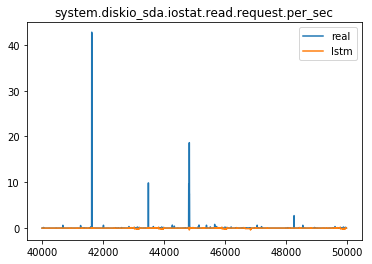

Mean Absolute Error :  0.09120797309376573


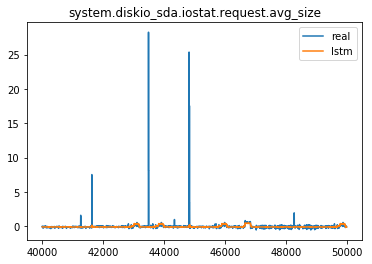

Mean Absolute Error :  0.14079580607150838


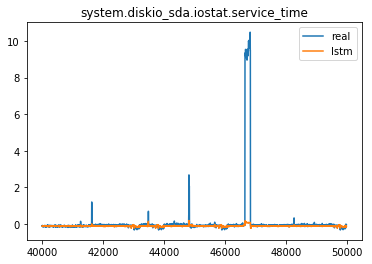

Mean Absolute Error :  0.21713341136213304


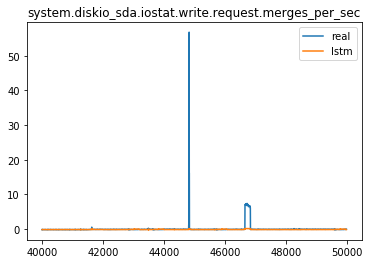

Mean Absolute Error :  0.23473965060040555


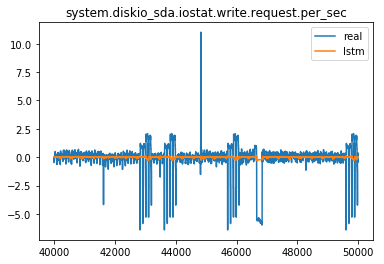

Mean Absolute Error :  0.5566976441681546


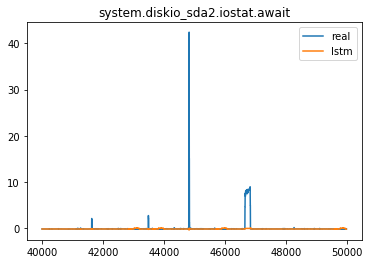

Mean Absolute Error :  0.2245347849473618


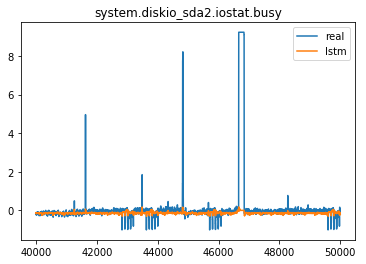

Mean Absolute Error :  0.29645371259615794


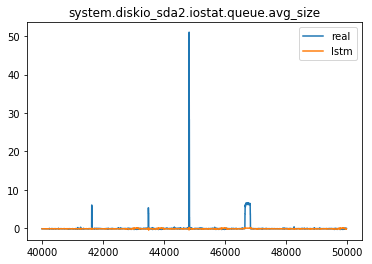

Mean Absolute Error :  0.2335994480498147


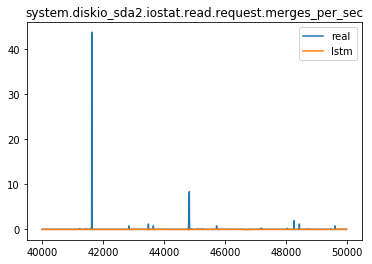

Mean Absolute Error :  0.05471244186220687


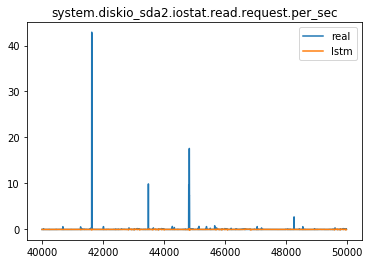

Mean Absolute Error :  0.07905177345837122


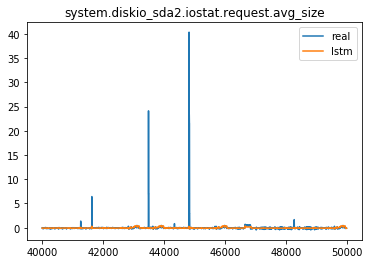

Mean Absolute Error :  0.15816517988623316


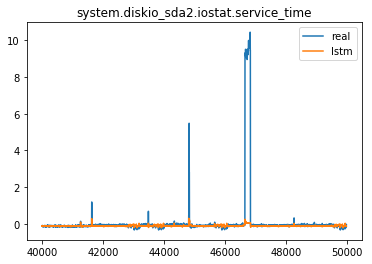

Mean Absolute Error :  0.22415465624827405


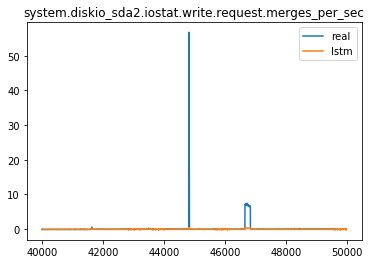

Mean Absolute Error :  0.22896033025378543


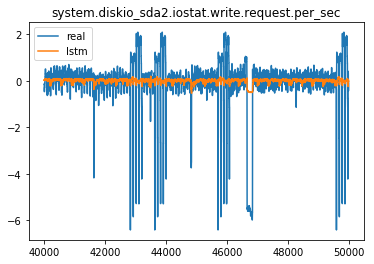

Mean Absolute Error :  0.5509410456073623


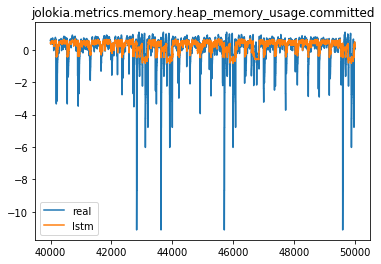

Mean Absolute Error :  0.5021928675766993


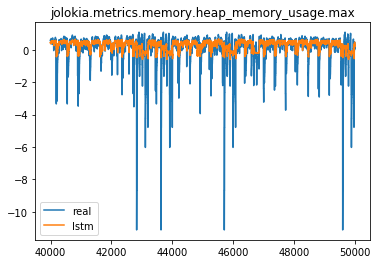

Mean Absolute Error :  0.5051840692848075


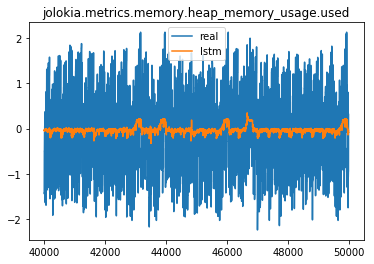

Mean Absolute Error :  0.8308850940892074


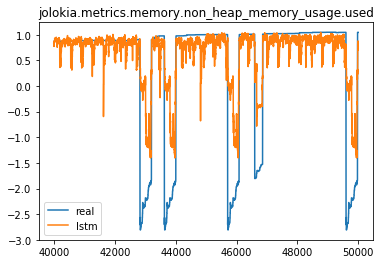

Mean Absolute Error :  0.42379633088458546


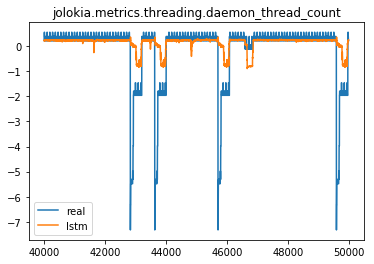

Mean Absolute Error :  0.4458552543447392


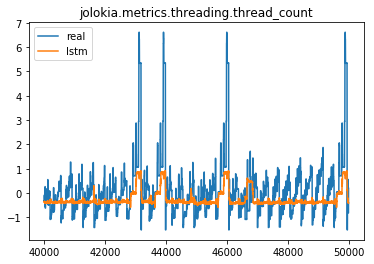

Mean Absolute Error :  0.6533455483472527


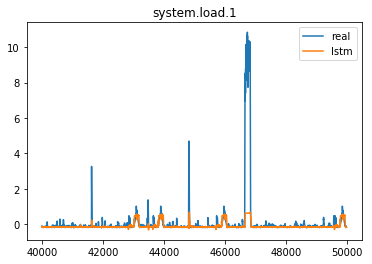

Mean Absolute Error :  0.2157554009224205


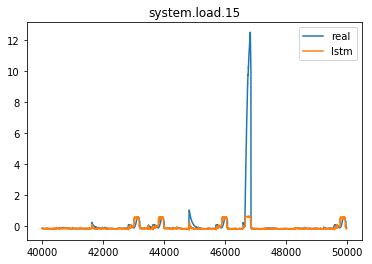

Mean Absolute Error :  0.21282723026226136


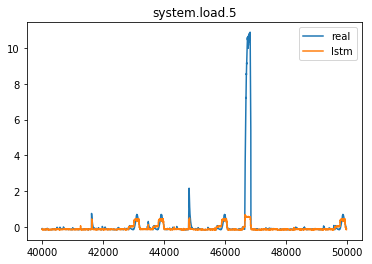

Mean Absolute Error :  0.21251500748912572


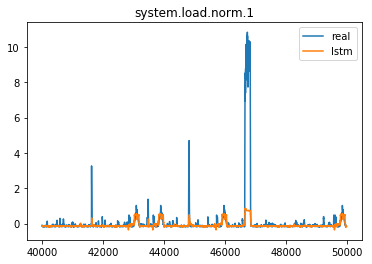

Mean Absolute Error :  0.2166995825179393


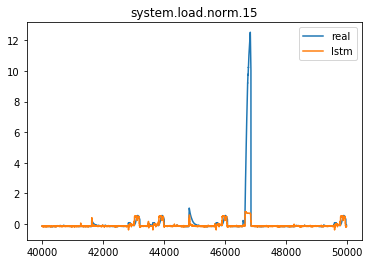

Mean Absolute Error :  0.20290458301251582


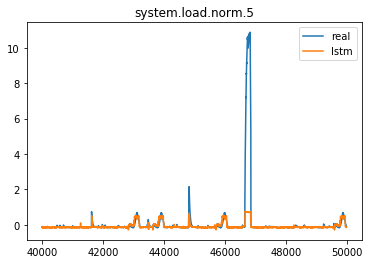

Mean Absolute Error :  0.2037040415940054


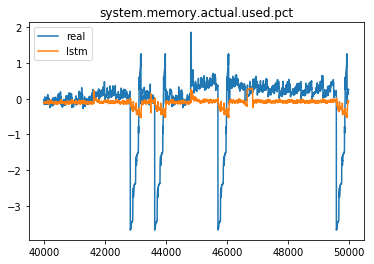

Mean Absolute Error :  0.4782933102463475


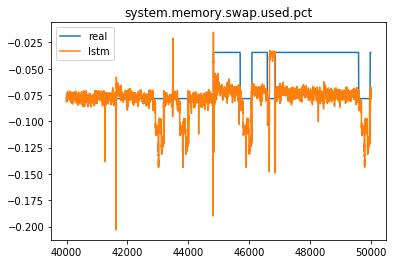

Mean Absolute Error :  0.022356072581603246


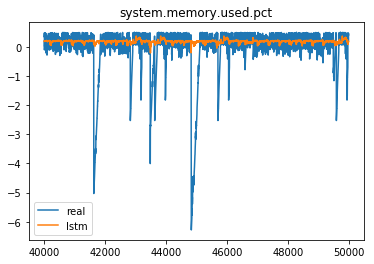

Mean Absolute Error :  0.38737874070268097


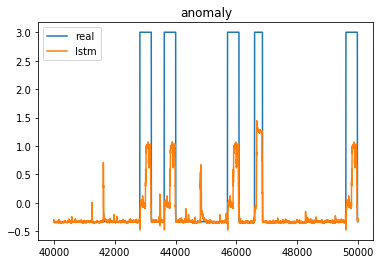

Mean Absolute Error :  0.46558528002372623


In [17]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]], label='lstm')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Absolute Error : ",mean_absolute_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]]))